## 密度聚类

- 基于密度的聚类算法（DBSCAN）是一种将密集点群聚在一起，并将孤立在低密度区域的点标记为离群点的聚类算法。它特别适用于在包含噪声和离群点的数据中发现任意形状的簇。

#### 关键概念：
- **Epsilon (ε)**：两个点之间的最大距离，使它们被视为在同一邻域内。
- **MinPts**：形成一个密集区域（簇）所需的最小点数。
- **核心点**：在 ε 距离内至少有 MinPts 个点的点。
- **边界点**：在 ε 距离内有一个核心点，但在 ε 距离内没有足够的点使其成为核心点的点。
- **噪声点**：既不是核心点也不是边界点的点。

#### 算法步骤：
1. 对于数据集中的每个点，通过计算在 ε 距离内的点数来检查它是否为核心点。
2. 如果它是核心点，则与所有在 ε 距离内的点（包括边界点）形成一个簇。
3. 对簇中的所有点重复此过程，递归地添加从核心点密度可达的点。
4. 将所有不属于任何簇的点标记为噪声。

#### 优点：
- 可以找到任意形状的簇。
- 对噪声和离群点具有鲁棒性。

#### 缺点：
- 需要仔细选择 ε 和 MinPts 参数。
- 不适用于具有不同密度的数据集。

#### 应用：
- 地理空间数据分析
- 图像分割
- 异常检测

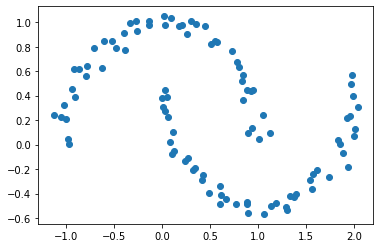

In [5]:
from sklearn import datasets
from matplotlib import pyplot as plt

noisy_moons, _ = datasets.make_moons(
    n_samples=100, noise=0.05, random_state=10
)  # 生成 100 个样本并添加噪声
noisy_moons[:5]

plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1])

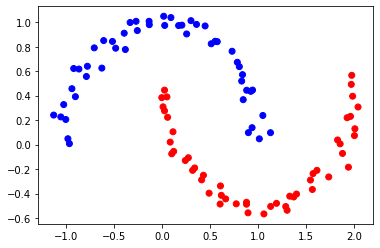

In [8]:
from sklearn.cluster import DBSCAN

dbscan_sk = DBSCAN(eps=0.5, min_samples=5, metric="euclidean")
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moons)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=dbscan_sk_c, cmap="bwr")

### HDBSCAN（层次密度聚类）

HDBSCAN（Hierarchical Density-Based Spatial Clustering of Applications with Noise）是 DBSCAN 的扩展，能够处理不同密度的簇，并且不需要指定 ε 参数。

#### 关键概念：
- **层次聚类**：通过构建一个层次树（dendrogram）来表示数据的聚类结构。
- **持久性**：衡量簇在不同密度水平下的稳定性。
- **最小簇大小**：形成一个簇所需的最小点数。

#### 优点：
- 能够处理不同密度的簇。
- 不需要指定 ε 参数。
- 自动选择最优的簇数。

#### 缺点：
- 计算复杂度较高。
- 对参数选择仍然敏感（如最小簇大小）。

### 对比DBSCAN总结

- **参数选择**：DBSCAN 需要指定 ε 和 MinPts 参数，而 HDBSCAN 只需要指定最小簇大小。
- **处理不同密度**：HDBSCAN 能够处理不同密度的簇，而 DBSCAN 在处理不同密度的簇时表现较差。
- **计算复杂度**：HDBSCAN 的计算复杂度较高，但能够自动选择最优的簇数。
- **应用场景**：DBSCAN 适用于密度均匀的数据集，而 HDBSCAN 更适用于密度不均匀的数据集。

### 应用场景

- **DBSCAN**：地理空间数据分析、图像分割、异常检测。
- **HDBSCAN**：金融数据分析、生物信息学、社交网络分析。

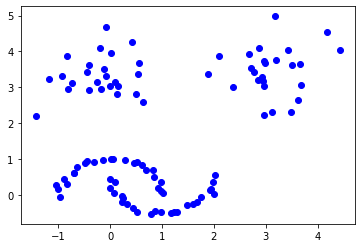

In [10]:
import numpy as np

moons, _ = datasets.make_moons(n_samples=50, noise=0.05, random_state=10)
blobs, _ = datasets.make_blobs(
    n_samples=50, centers=[(-0.25, 3.25), (3, 3.5)], cluster_std=0.6, random_state=10
)

noisy_moons_blobs = np.vstack([moons, blobs])
plt.scatter(noisy_moons_blobs[:, 0], noisy_moons_blobs[:, 1], color="b")

c:\Users\theth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\theth\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


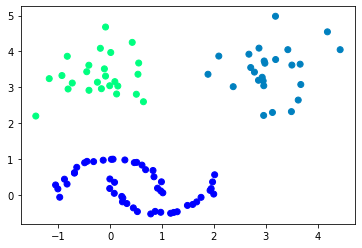

In [12]:
import hdbscan

# gen_min_span_tree 参数为下文绘图做准备
hdbscan_m = hdbscan.HDBSCAN(gen_min_span_tree=True)
hdbscan_m_c = hdbscan_m.fit_predict(noisy_moons_blobs)

plt.scatter(
    noisy_moons_blobs[:, 0], noisy_moons_blobs[:, 1], c=hdbscan_m_c, cmap="winter"
)